<a href="https://colab.research.google.com/github/Anantha-Rao12/ML4SCI-NMR-evaltasks/blob/main/ML4SCI_NMR_evaltest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing Dependencies

In [1]:
# Numpy for Matrix Manipulatons 
import numpy as np

# Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()


# Sklearn for Model Utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Tensorflow and Keras for deep learning
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout

print('Tensorflow Version:', tf.__version__)
print('Keras Version:', keras.__version__)

Tensorflow Version: 2.4.1
Keras Version: 2.4.3


# Importing Data and Preprocessing

In [2]:
mat_file = "/content/drive/MyDrive/GSoC/ML4SCI/evaluation/mat_info.txt"
M_file_r = "/content/drive/MyDrive/GSoC/ML4SCI/evaluation/echos_r.txt" # real part of echos
M_file_i = "/content/drive/MyDrive/GSoC/ML4SCI/evaluation/echos_i.txt" # imaginary part of echos


mat_info = np.loadtxt(mat_file, comments="#", delimiter=None, unpack=False);

# M(t) curve for each simulation:
M_r = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M = M_r + 1j*M_i;
print("Done with numpy loads")

Done with numpy loads


In [3]:
# Splitting the train and test data (70-30%)

X_train, X_test, y_train, y_test = train_test_split(np.abs(M), mat_info, test_size=0.3, random_state=42)


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4200, 471) (4200, 3)
(1800, 471) (1800, 3)


In [5]:
X,y = np.abs(M), mat_info

scaler = MinMaxScaler()
print(scaler.fit(X))
scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


array([[0.        , 0.68923197, 0.11030414, ..., 0.02135284, 0.02311916,
        0.02540811],
       [0.        , 0.96449132, 0.66698248, ..., 0.20782668, 0.20731813,
        0.20603596],
       [0.        , 0.88585936, 0.71986636, ..., 0.03943324, 0.04221565,
        0.04701722],
       ...,
       [0.        , 0.37703373, 0.73750707, ..., 0.15395052, 0.14895037,
        0.14393009],
       [0.        , 0.6943363 , 0.62922984, ..., 0.01279441, 0.0101429 ,
        0.00813061],
       [0.        , 0.48805801, 0.39572889, ..., 0.0090352 , 0.00649808,
        0.00446664]])

# Step 3 : Building and Training the Model

In [6]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64,activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(3)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['accuracy','mse',])
    return model

In [7]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                30208     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 34,563
Trainable params: 34,563
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X, y, epochs=70, batch_size=32,validation_split=0.30,verbose=1)
# use 30% for validation

Epoch 1/70
132/132 [==============================] - 1s 6ms/step - loss: 31.6515 - accuracy: 0.6242 - mse: 31.6515 - val_loss: 18.6561 - val_accuracy: 0.6439 - val_mse: 18.6561
Epoch 2/70
132/132 [==============================] - 0s 2ms/step - loss: 19.9451 - accuracy: 0.6321 - mse: 19.9451 - val_loss: 15.5940 - val_accuracy: 0.6517 - val_mse: 15.5940
Epoch 3/70
132/132 [==============================] - 0s 2ms/step - loss: 17.0319 - accuracy: 0.6454 - mse: 17.0319 - val_loss: 15.2366 - val_accuracy: 0.6383 - val_mse: 15.2366
Epoch 4/70
132/132 [==============================] - 0s 2ms/step - loss: 17.3597 - accuracy: 0.6674 - mse: 17.3597 - val_loss: 14.7576 - val_accuracy: 0.6667 - val_mse: 14.7576
Epoch 5/70
132/132 [==============================] - 0s 2ms/step - loss: 16.8548 - accuracy: 0.6623 - mse: 16.8548 - val_loss: 15.0220 - val_accuracy: 0.6522 - val_mse: 15.0220
Epoch 6/70
132/132 [==============================] - 0s 2ms/step - loss: 16.9452 - accuracy: 0.6641 - mse: 16

# Step 4 : Plot Model Performance

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])

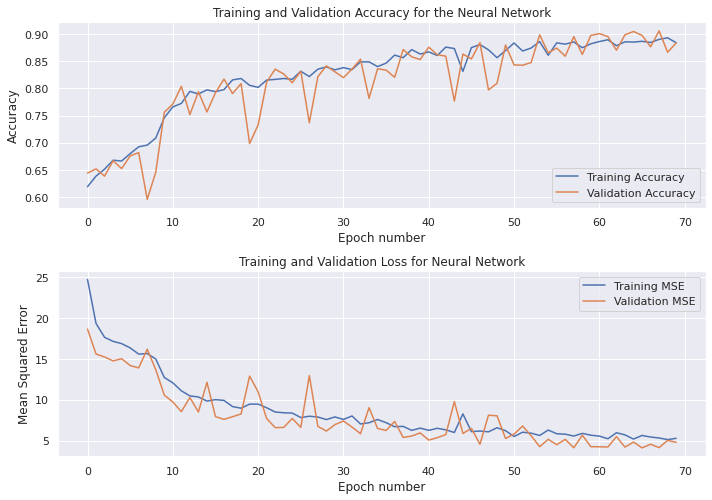

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.xlabel('Epoch number' )
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for the Neural Network')

plt.subplot(3, 1, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
#plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for Neural Network')
plt.xlabel('Epoch number')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()



In [11]:
# Here we look a particular example i.e we predict a particular alpha, xi, gamma 
# for a M-curve and look at the actual output 

example_no = 120  # change the value to test model predictions

pred_val, true_val = model.predict(X_test[example_no:example_no+1,:]), y_test[example_no]
print(f'Predicted parameters for a example {example_no}: \n \t alpha = {pred_val[0,0]:.5}, xi = {pred_val[0,1]:.5}, gamma = {pred_val[0,2]:.5}')
print(f'True parameters for a example {example_no}: \n \t alpha = {true_val[0]:.5}, xi = {true_val[1]:.5}, gamma = {true_val[2]:.5}')

Predicted parameters for a example 120: 
 	 alpha = 17.58, xi = 3.6824, gamma = -0.0016798
True parameters for a example 120: 
 	 alpha = 18.89, xi = 4.2976, gamma = 0.001821


# Future things to look at : 

Here, we looked at a simple example of regression with Artificial Neural networks with connected dense layers using the Keras API. Since, this exercise is part of a more general assessment task of predicting NMR parameters using Machine Learning, the model architecture and other statistical nuances have been ignored.   
Although, the percentage accuracy and mean-squared-error of the model is no-where near current industry standards, we can implement certain steps to improve the model performance. Some of them are :


1. Hyperparameter tuning with the Neural Network
    - One can vary the number of layers in the Dense network, the number of neurons in each layer and also play with the parameters including  Batch Normalization, Max pooling, Dropout and analyse its implications on the final model. A more general approach can be to decrease the bias and variance of the model by employing more complex models and regularization techniques. 

2. Regression after classification
    - Based on the original jupyter notebook containing some preliminary data analysis, one can explore if the dataset can be partitioned and represented by two or more labels. This can be based on the low and large values of the Spin echo at around timestamp 300-350 and its correlation with the initail 180 pulse. Regression might work well with such a dataset where separate models are built for both/all the cases. 

Thank you ! 
